In [1]:
#CNN model to classify between cat and a dog 

In [60]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Dataset  

In [61]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [62]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

#To train the model appropriately, we need to rescale rgb values between 0 and 1
X_train = X_train/255.0
Y_train = Y_train/255.0

In [63]:
print("Shape of X_train:", X_train.shape) #30,000 here means img size 100 x 100 x 3(rgb value) = 30000
print("Shape of Y_train:", Y_train)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: [[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.00392157]
 [0.00392157]
 [0.00392157]]
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


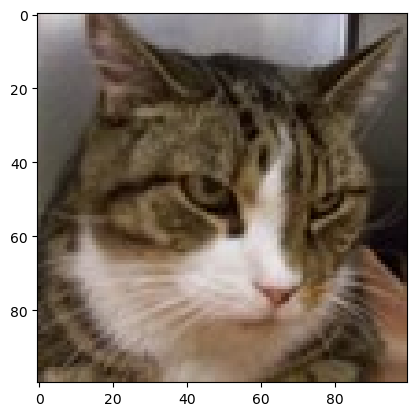

In [67]:
#X_train[1, :] #To display image dimensions
#To display any random image 
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])

## Model 

In [68]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),  #First Layer
    MaxPooling2D(2,2), #Second layer
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
           
    Flatten(),
    Dense(64, activation = 'relu'), 
    Dense(1, activation = 'sigmoid')    #Output layer 
]) 
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,665 (4.17 MB)

 Trainable params: 1,093,665 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Explanation
#Sequential model means the layers in model are stacked into a sequence like convolution layer , maxpooling layer, convolution layer, maxpooling layer and so on
#First layer Conv2D takes parameters; No of filters; 32 here , size of the filter (3,3(height,width)), activation function; relu here and first layer always mentions input_shape which is the size of image the model needs to expect(100x100x3 here)
#Second layer is Maxpooling2D which takes filter size as parameter; stride n all can be given but if not given default values can work
#Next time, no need to add input_shape in Conv2D

#Dense layer means fully connected layer; 64 indicates no of neurons that we want to keep
# For binary classification we only need 1 out neuron thus 1 in output layer, activation_func is sigmoid as it's a binary classification


In [ ]:
#Another way of defining this model
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3))
model.add(MaxPooling2D(2,2))
          
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
          
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [69]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#model.compile takes parameters loss, optimizer and metrics
#binary_crossentropy because it's a binary classification model
#loss function depends on the type of model we are making
#optimizers can also be different

In [70]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.4471 - loss: 0.1093
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.5003 - loss: 0.0156
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.5083 - loss: 0.0143
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.5084 - loss: 0.0140
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.4879 - loss: 0.0145


## Evaluation performance on Test Dataset 

In [72]:
model.evaluate(X_test, Y_test) 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7916 - loss: 175.3730


[418.6583251953125, 0.5]

## Making Predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


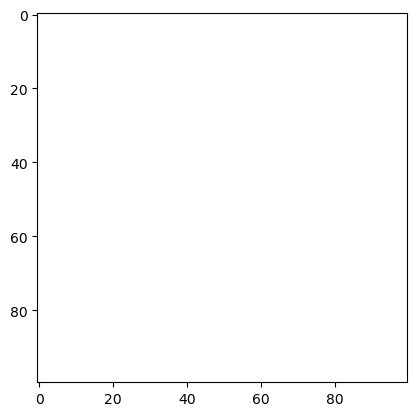

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Model Prediction: dog


In [82]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
#print(y_pred)
y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("Model Prediction:", pred)    

In [81]:
print("Number of dog images in training set:", np.sum(Y_train == 0))
print("Number of cat images in training set:", np.sum(Y_train == 1))


Number of dog images in training set: 1000
Number of cat images in training set: 0
